<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/ME239_HW09_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture09:homework)=
# Homework 9

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

/tmp/ipython-input-122018214.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


(lecture09:homework:problem1)=
## Problem 1: Predicting the probability of major earthquakes in Southern California

We are going to revisit the {ref}`lecture07:homework:problem2`, but this time we are going to use a Poisson distribution to carry out our analysis.

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). I have done this for you.

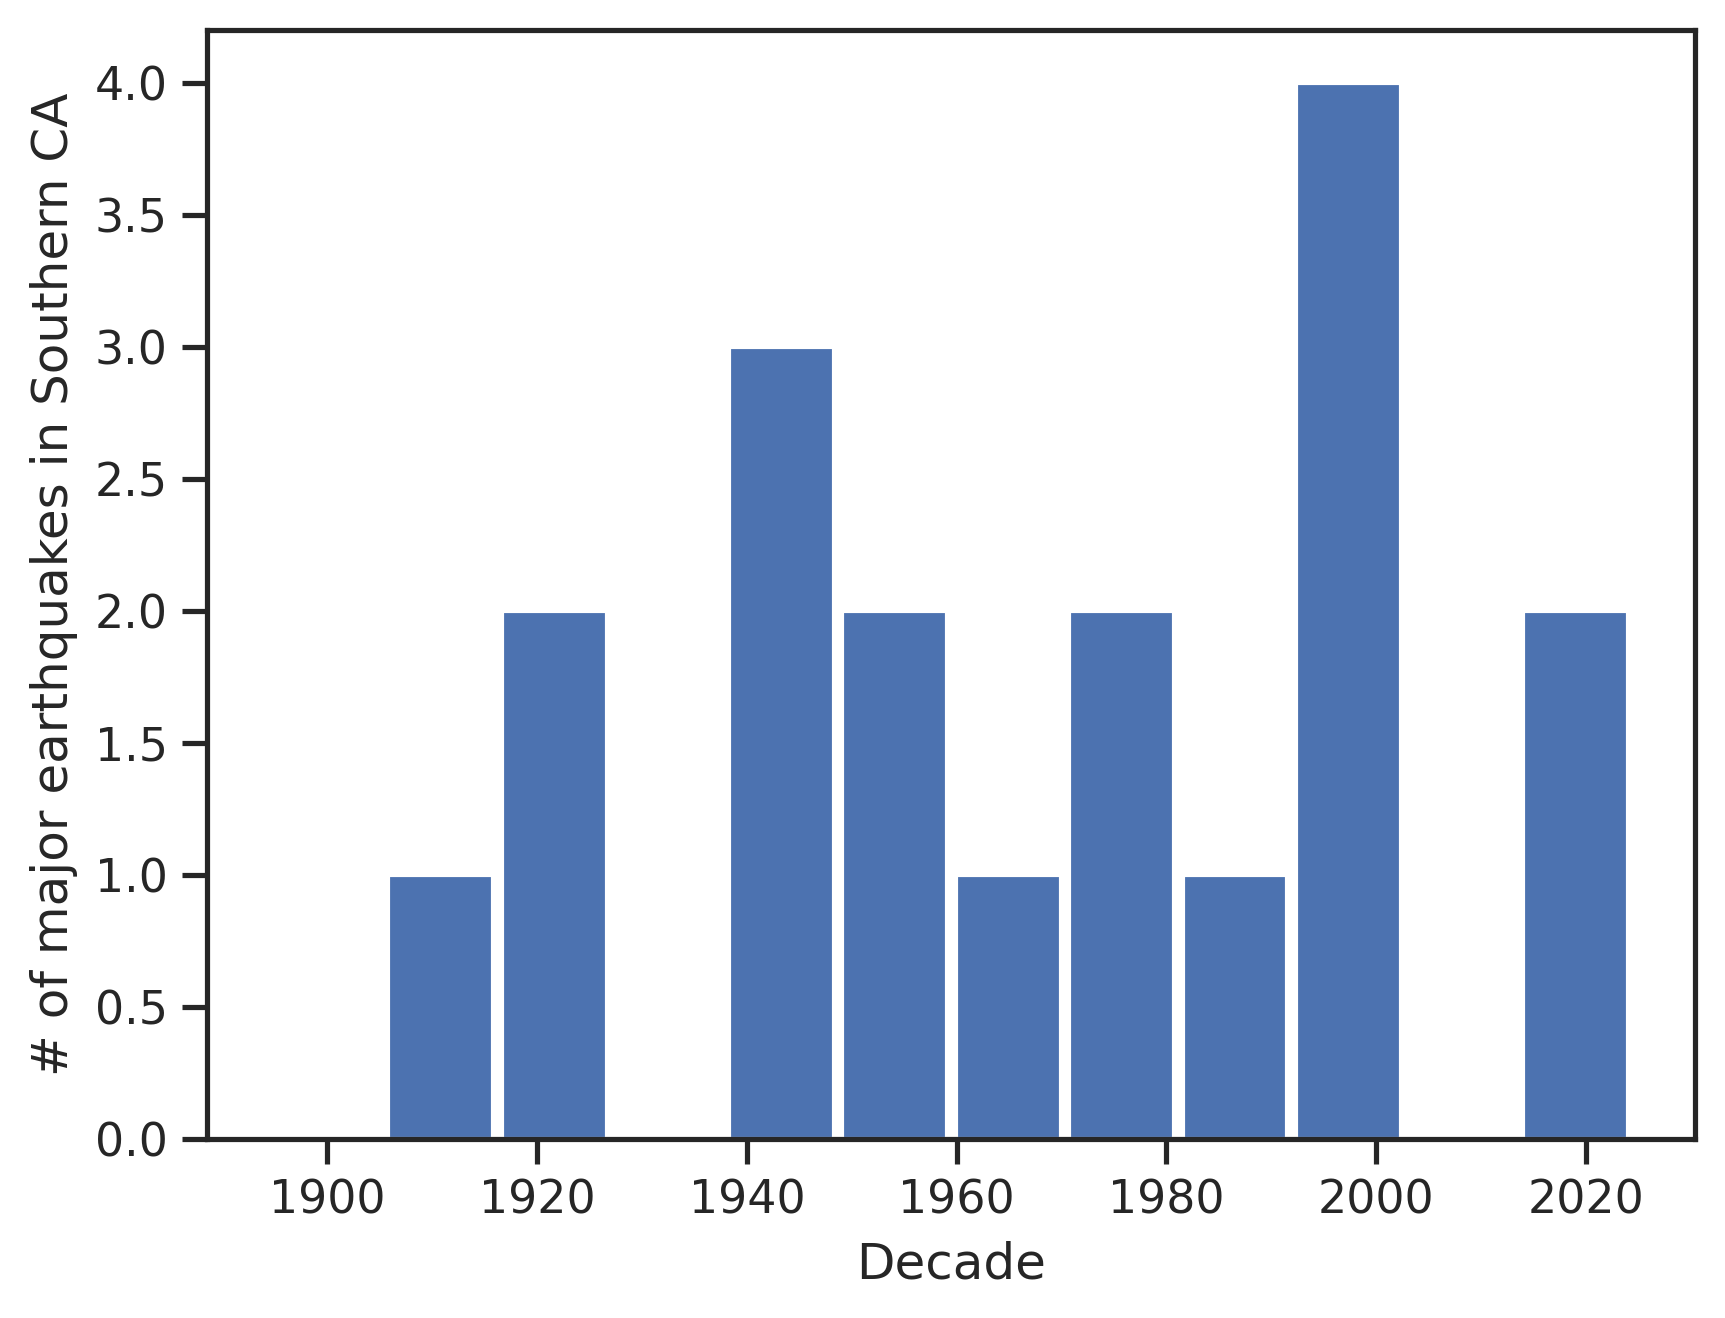

In [ ]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:
$$
X \sim \operatorname{Poisson}(r),
$$
where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.


+ Use the `eq_data` to find the rate $r$ of the Poisson. We can set it as the empirical average of the observed number of earthquakes per decade:

In [ ]:
# Empirical average of observed number of earthquakes per decade
r = sum(eq_data) / len(eq_data)
print(r)

1.5


+ Initialize a Poisson random variable $X$ with rate parameter $r$ using `scipy.stats`. Hint: See {ref}`lecture09:the-poisson-distribution`.

In [ ]:
X = st.poisson(r) # Iniitialzing using the calculated r and instructions from lecture 9

+ Plot the probability mass function of $X$.

Probability of number of earthquakes in next 100 years:
 [0.22313016 0.33469524 0.25102143 0.12551072 0.04706652 0.01411996]


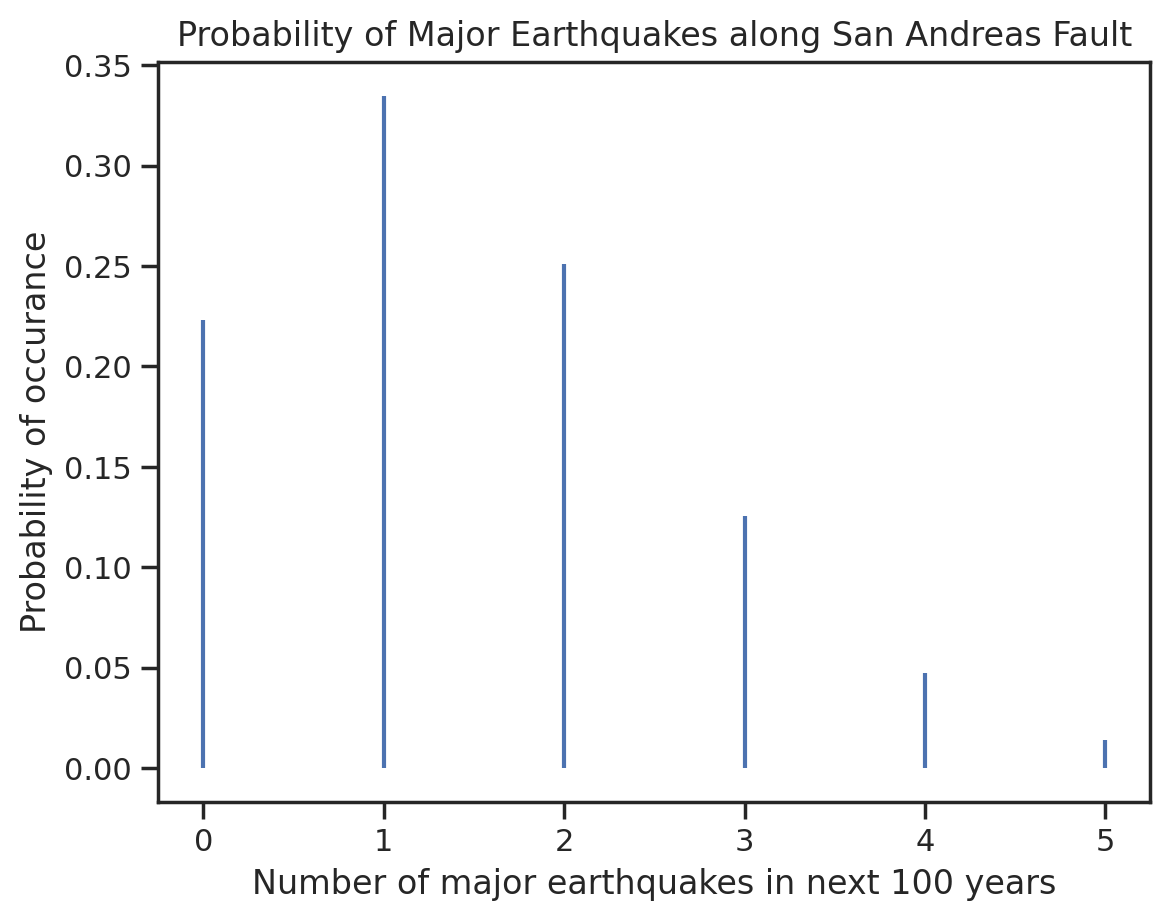

In [ ]:
# Adapting code from lecture for use in this assignment
ks = range(6) # go up to the probability of 5
fig, ax = plt.subplots()
ax.vlines(ks, 0, X.pmf(ks))
ax.set_title("Probability of Major Earthquakes along San Andreas Fault")
ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurance')
ax.set_xticks(ks);

print(f'Probability of number of earthquakes in next 100 years:\n {X.pmf(ks)}')


+ What is the probability that no major earthquake will occur during the next decade?

**Answer:** From the graph and printing out the values determined by the pmf function, the probability is: 0.22313016
<br><br><br><br><br><br><br><br>

In [ ]:
# Code repeated here to show (index corresponds to the number of earthquakes, value corresponds to the probability)
probAry = X.pmf(ks)
print(f'Probability of number of earthquakes in next 100 years:\n {probAry}')
print(f'Probability of 0 major earthquakes in the next 100 years is {probAry[0]}')

Probability of number of earthquakes in next 100 years:
 [0.22313016 0.33469524 0.25102143 0.12551072 0.04706652 0.01411996]
Probability is 0.22313016014842982


+ What is the probability that one or two major earthquakes will occur during the next decade?

**Answer:** Answer shown in code (approx 0.2510)
<br><br><br><br><br><br><br><br>

In [ ]:
# Your may use code to answer
print(f'Probability of 2 major earthquakes in the next 100 years is {probAry[2]}')

Probability of 2 major earthquakes in the next 100 years is 0.25102143016698353


+ What is the probability that at least one major earthquake will occur during the next decade? Hint: Use the obvious rule.

**Answer:** Answer shown in code, 1 - probability of 0 occuring is the probability of at least 1 occuring: 0.77686
<br><br><br><br><br><br><br><br>

In [ ]:
# 1 - prob of 0 is the probabilty of at least one earthquake occuring
print(f'Probability of at least 1 major earthquake in the next 100 years is {1 - probAry[0]}')


Probability of at least 1 major earthquake in the next 100 years is 0.7768698398515702


Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/ME239_HW09_novak104.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27 libgslcblas0
  libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5 libhunspell-1.7-0 libidn12
  libijs-0.35 